In [324]:
from units import *
import matplotlib.pyplot as plt
from astrometry_sim import QuasarSim
import healpy as hp
from pylab import cm as cmaps
from estimator_wholesky import get_vector_alm
from tqdm import *
from astropy import units as u

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [345]:
max_sep = 10
nside = 128
lmax = 3*nside - 1
nsim = 1

sim = []

for isim in tqdm_notebook(range(nsim)):
#     sim.append(QuasarSim(n_sh=1, sh_m_frac=0.2, max_sep=max_sep, m_delta=1e8*M_s, verbose=True, sh_distrib='MW', sim_uniform=True, nside=nside, 
#                          custom_coords=[[0*u.deg],[0*u.deg],[6*u.mas/u.year],[3*u.mas/u.year],[100*kpc]], calc_powerspecs=True, do_alpha=True))
#     sim.append(QuasarSim(n_sh=1, sh_m_frac=0.2, max_sep=max_sep, m_delta=1e6*M_s, verbose=True, sh_distrib='MW', sim_uniform=True, nside=nside, 
#                          custom_coords=[[180*u.deg,90*u.deg,],[45*u.deg, 0*u.deg],[60*u.mas/u.year,60*u.mas/u.year],[3*u.mas/u.year, 3*u.mas/u.year],[70*kpc, 70*kpc]], do_alpha=True, calc_powerspecs=True))

#     sim.append(QuasarSim(sh_m_frac=0.2, max_sep=max_sep, m_delta=1e8*M_s, verbose=True, sh_distrib='MW', sim_uniform=True, nside=nside, c200_delta=10000, save_powerspecs=True))
    sim.append(QuasarSim(alpha_m=1.9, n_calib=150, max_sep=max_sep, verbose=True, sh_distrib='Aq1', m_min=1e-5, sim_uniform=True, nside=nside, calc_powerspecs=True, do_alpha=True))

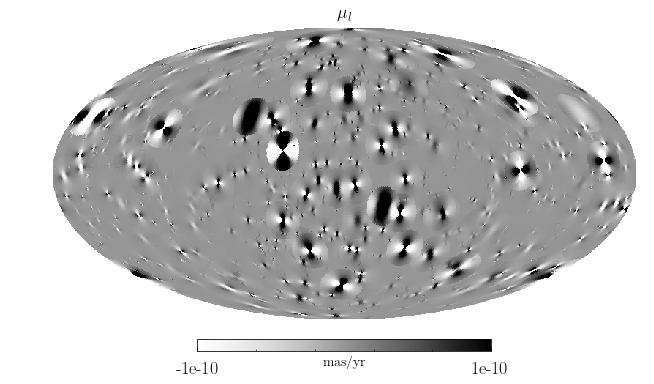

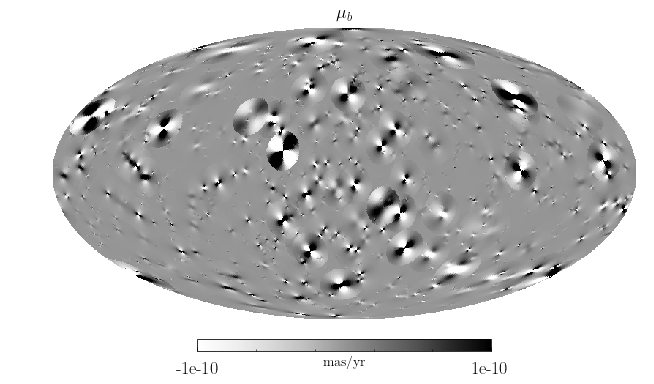

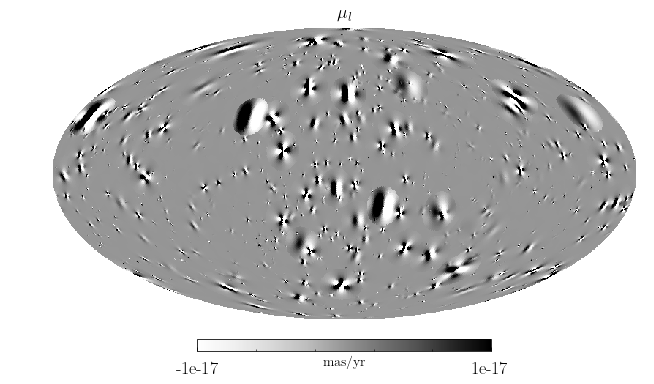

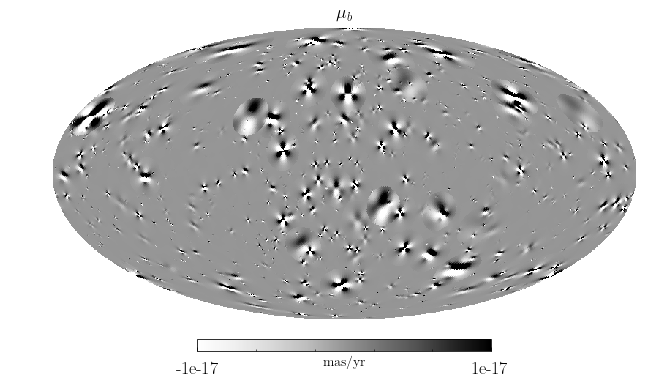

In [346]:
maxx = 10**(-10)
maxx_a = 10**(-17)

cmap = cmaps.Greys
cmap.set_under('w')

for i in range((nsim)):

    hp.mollview(sim[i].mu_qsrs[:,0],max=maxx, min=-maxx, title="$\mu_l$", unit='mas/yr', cmap=cmap)
    hp.mollview(sim[i].mu_qsrs[:,1],max=maxx, min=-maxx, title="$\mu_b$", unit='mas/yr', cmap=cmap)

    hp.mollview(sim[i].alpha_qsrs[:,0],max=maxx_a, min=-maxx_a, title="$\mu_l$", unit='mas/yr', cmap=cmap)
    hp.mollview(sim[i].alpha_qsrs[:,1],max=maxx_a, min=-maxx_a, title="$\mu_b$", unit='mas/yr', cmap=cmap)

In [347]:
def bin_cells(cells, lmin, lmax, nbins):
    bin_edges = np.round(np.logspace(np.log10(lmin),np.log10(lmax), nbins + 1))
    cells_binned = [np.mean(cells[np.int(bin_edges[i]):np.int(bin_edges[i+1])]) for i in range(nbins)]
    ells_binned = (bin_edges[1:] + bin_edges[:-1])/2.
    return ells_binned, cells_binned


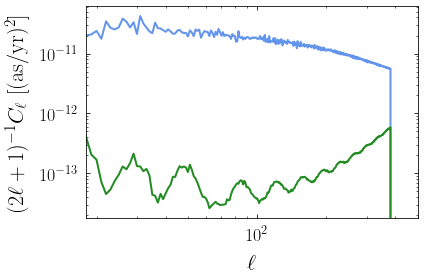

In [348]:
ell = np.arange(len(sim[0].Cl_B))

# plt.plot(C_ells/1e-12)

plt.plot(ell, sim[0].Cl_B/(2*ell + 1)/1e-12)
plt.plot(ell, sim[0].Cl_C/(2*ell + 1)/1e-12)

# ells, Cl = bin_cells(sim[0].Cl_B/(2*ell + 1)/1e-12, 1, np.max(ell)+1, 20)
# plt.plot(ells, Cl)

# plt.plot(ell, sim[0].Cl_B_alpha/(2*ell + 1)/1e-12)
# plt.plot(ell, sim[0].Cl_C_alpha/(2*ell + 1)/1e-12)

# plt.plot(ell, (sim[0].Cl_B_mu_alpha)/(2*ell + 1)/1e-12)
# plt.plot(ell, (sim[0].Cl_C_mu_alpha)/(2*ell + 1)/1e-12)

# plt.ylim(1e-19,1e-8)
plt.yscale("log")
plt.xscale("log")
plt.xlim(180/max_sep, 500)
plt.ylabel("$(2\ell + 1)^{-1} C_\ell$ [(as/yr)$^2$]")
plt.xlabel("$\ell$")
# plt.legend(title='Distance to lens')
# plt.title('Gaussian lens, $R_0$ = 1 kpc, $M_0 = 10^8\,\mathrm{M}_\odot$, $\dot\\theta$ = 1 mas/yr')
plt.tight_layout()
# plt.savefig("Gauss.pdf")

In [349]:
lmin_plot = 20
lmax_plot = 300

In [350]:
# sim[i].Cl_B

/scratch/sm8383/anaconda3/envs/venv_smsharma/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, '$\\log_{10}(\\Psi_{lm}\\,[mas/yr])$')

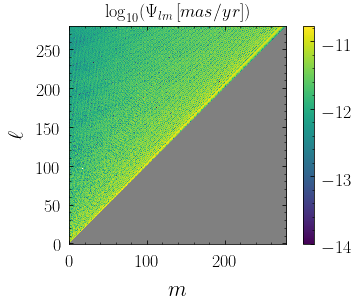

In [351]:
plt.imshow((np.log10(np.abs(sim[i].fB)[lmin_plot:lmax_plot,lmin_plot:lmax_plot])), origin='lower', vmin=-14)
cbar = plt.colorbar()

plt.xlabel("$m$")
plt.ylabel("$\ell$")

plt.title("$\log_{10}(\Psi_{lm}\,[mas/yr])$")

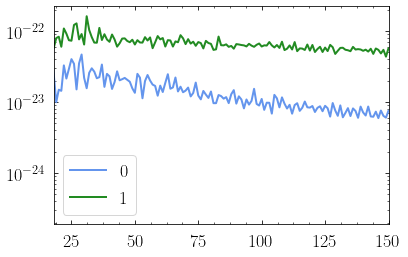

In [352]:
nch = 2
ch = np.transpose([[np.mean(split_ary) for split_ary in np.array_split((np.abs(sim[i].fB)**2)[l][:l], nch)] for l in range(lmax)])
ell = np.arange(len(ch[0]))

for ich in range(nch):
    plt.plot(ell, 2*ch[ich], label=str(ich))
# plt.plot(ell, 1e6*Cl_tot[1:]*ell*(ell+1), label="Tot", color='grey', alpha=0.9)

plt.legend()
plt.xlim((180/max_sep), 150)
# plt.ylim(1e-32,1e-27)
# plt.xscale("log")
plt.yscale("log")